# **Predicting Laptop Prices: A Multiple Regression Approach**


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('laptop_data.csv')
df.head()

,graphic card type,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
0,dedicated graphics,1920 x 1080,4,32 gb,['no system'],ssd + hdd,"['keyboard', 'touchpad', 'illuminated keyboard...","['SD card reader', 'camera', 'speakers', 'micr...",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.0
1,dedicated graphics,1366 x 768,4,8 gb,['windows 10 home'],ssd,"['keyboard', 'touchpad', 'numeric keyboard']","['SD card reader', 'camera', 'speakers', 'micr...",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.0
2,NaN,1920 x 1080,2,8 gb,['windows 10 home'],hdd,NaN,['SD card reader'],ddr4,1.6,intel core i7,new,1000.0,producer warranty,"15"" - 15.9""",3399.0
3,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,new,NaN,producer warranty,NaN,1599.0
4,integrated graphics,2560 x 1440,4,8 gb,['windows 10 home'],ssd,"['keyboard', 'touchpad', 'illuminated keyboard']","['SD card reader', 'camera', 'speakers', 'micr...",ddr4,1.2,other CPU,new,256.0,producer warranty,"12"" - 12.9""",4499.0


In [ ]:
import pandas as pd

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7853 entries, 0 to 7852
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   graphic card type       7357 non-null   object 
 1   resolution (px)         7245 non-null   object 
 2   CPU cores               7853 non-null   object 
 3   RAM size                7403 non-null   object 
 4   operating system        7203 non-null   object 
 5   drive type              7418 non-null   object 
 6   input devices           7175 non-null   object 
 7   multimedia              7145 non-null   object 
 8   RAM type                6989 non-null   object 
 9   CPU clock speed (GHz)   6917 non-null   float64
 10  CPU model               7320 non-null   object 
 11  state                   7853 non-null   object 
 12  drive memory size (GB)  7372 non-null   float64
 13  warranty                7853 non-null   object 
 14  screen size             7507 non-null   

### **EXPLORING THE DATASET  & DATA CLEANING**

In [ ]:
df.dtypes

graphic card type          object
resolution (px)            object
CPU cores                  object
RAM size                   object
operating system           object
drive type                 object
input devices              object
multimedia                 object
RAM type                   object
CPU clock speed (GHz)     float64
CPU model                  object
state                      object
drive memory size (GB)    float64
warranty                   object
screen size                object
buynow_price              float64
dtype: object

In [ ]:
df.shape

(7853, 16)

In [ ]:
# Look at unique values of each column, except the ones formatted as list
for col in df.columns.to_list():
    if type(df[col][0])!=list:
        print(f"unique values of {col} are: ", df[col].unique())
        print("-----------------------------------------------------")

unique values of graphic card type are:  ['dedicated graphics' nan 'integrated graphics']
-----------------------------------------------------
unique values of resolution (px) are:  ['1920 x 1080' '1366 x 768' nan '2560 x 1440' '1600 x 900' '3840 x 2160'
 'other' '1920 x 1280' '1280 x 800' '3200 x 1800' '2880 x 1620'
 '2160 x 1440' '1920 x 1200' '2560 x 1600']
-----------------------------------------------------
unique values of CPU cores are:  ['4' '2' 'not applicable' '3' '1' '8' '6']
-----------------------------------------------------
unique values of RAM size are:  ['32 gb' '8 gb' nan '12 gb' '4 gb' '16 gb' '2 gb' '20 gb' '6 gb' '64 gb'
 '256 mb' '24 gb']
-----------------------------------------------------
unique values of operating system are:  ["['no system']" "['windows 10 home']" nan
 "['windows 8.1 home 64-bit', 'other']" "['windows 10 professional']"
 "['windows 7 professional 64-bit']"
 "['windows 7 professional 64-bit', 'windows 10 professional']"
 "['windows 10 home'

Here we can see the state column has only one unique value so this column has no effect on response vvariable i.e "price"

In [ ]:
#Here we are going to drop the state column using .drop function
df=df.drop(columns=['state',"multimedia","input devices"])
df.shape

(7853, 13)

In [ ]:
df=df.dropna()
df.head(5)

,graphic card type,CPU cores,RAM size,operating system,drive type,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price,resolution_x,resolution_y
0,dedicated graphics,4,32,['no system'],ssd + hdd,ddr4,2.6,intel core i7,1250.0,producer warranty,17,4999.0,1920,1080
1,dedicated graphics,4,8,['windows 10 home'],ssd,ddr3,2.4,intel core i7,256.0,seller warranty,15,2649.0,1366,768
4,integrated graphics,4,8,['windows 10 home'],ssd,ddr4,1.2,other CPU,256.0,producer warranty,12,4499.0,2560,1440
5,integrated graphics,2,8,['windows 10 home'],hdd,ddr4,2.0,intel core i3,1000.0,producer warranty,15,2099.0,1366,768
6,dedicated graphics,4,8,"['windows 8.1 home 64-bit', 'other']",hdd,ddr3,2.4,intel core i7,1000.0,producer warranty,17,2699.0,1920,1080


In [ ]:
df.shape

(6247, 13)

No we can see column communications,input devices and multimedia have multiple values in list form so we will split them into different columns

In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df

,graphic card type,resolution (px),CPU cores,RAM size,operating system,drive type,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price
0,dedicated graphics,1920 x 1080,4,32 gb,['no system'],ssd + hdd,ddr4,2.6,intel core i7,1250.0,producer warranty,"17"" - 17.9""",4999.00
1,dedicated graphics,1366 x 768,4,8 gb,['windows 10 home'],ssd,ddr3,2.4,intel core i7,256.0,seller warranty,"15"" - 15.9""",2649.00
4,integrated graphics,2560 x 1440,4,8 gb,['windows 10 home'],ssd,ddr4,1.2,other CPU,256.0,producer warranty,"12"" - 12.9""",4499.00
5,integrated graphics,1366 x 768,2,8 gb,['windows 10 home'],hdd,ddr4,2.0,intel core i3,1000.0,producer warranty,"15"" - 15.9""",2099.00
6,dedicated graphics,1920 x 1080,4,8 gb,"['windows 8.1 home 64-bit', 'other']",hdd,ddr3,2.4,intel core i7,1000.0,producer warranty,"17"" - 17.9""",2699.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7845,dedicated graphics,1920 x 1080,4,32 gb,['windows 10 home'],ssd,ddr4,2.8,intel core i7,500.0,producer warranty,"15"" - 15.9""",5599.00
7846,dedicated graphics,1600 x 900,4,8 gb,['windows 10 home'],hdd,ddr3,2.2,intel core i7,1000.0,seller warranty,"17"" - 17.9""",2925.36
7847,dedicated graphics,1920 x 1080,4,8 gb,['no system'],ssd + hdd,ddr4,2.6,intel core i7,1120.0,producer warranty,"17"" - 17.9""",3799.00
7848,dedicated graphics,1920 x 1080,4,12 gb,['no system'],ssd + hdd,ddr4,2.8,intel core i7,1256.0,producer warranty,"15"" - 15.9""",5589.00


In [ ]:
#We have two types of values in RAM column, one with gb and other with mb, we have to convert mb to gb and remove the gb notation
df['RAM size']=df['RAM size'].str.replace('gb','',regex=True)
df['RAM size']=df['RAM size'].str.replace('256 mb','0.256',regex=False)
df

,graphic card type,resolution (px),CPU cores,RAM size,operating system,drive type,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price
0,dedicated graphics,1920 x 1080,4,32,['no system'],ssd + hdd,ddr4,2.6,intel core i7,1250.0,producer warranty,"17"" - 17.9""",4999.00
1,dedicated graphics,1366 x 768,4,8,['windows 10 home'],ssd,ddr3,2.4,intel core i7,256.0,seller warranty,"15"" - 15.9""",2649.00
4,integrated graphics,2560 x 1440,4,8,['windows 10 home'],ssd,ddr4,1.2,other CPU,256.0,producer warranty,"12"" - 12.9""",4499.00
5,integrated graphics,1366 x 768,2,8,['windows 10 home'],hdd,ddr4,2.0,intel core i3,1000.0,producer warranty,"15"" - 15.9""",2099.00
6,dedicated graphics,1920 x 1080,4,8,"['windows 8.1 home 64-bit', 'other']",hdd,ddr3,2.4,intel core i7,1000.0,producer warranty,"17"" - 17.9""",2699.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7845,dedicated graphics,1920 x 1080,4,32,['windows 10 home'],ssd,ddr4,2.8,intel core i7,500.0,producer warranty,"15"" - 15.9""",5599.00
7846,dedicated graphics,1600 x 900,4,8,['windows 10 home'],hdd,ddr3,2.2,intel core i7,1000.0,seller warranty,"17"" - 17.9""",2925.36
7847,dedicated graphics,1920 x 1080,4,8,['no system'],ssd + hdd,ddr4,2.6,intel core i7,1120.0,producer warranty,"17"" - 17.9""",3799.00
7848,dedicated graphics,1920 x 1080,4,12,['no system'],ssd + hdd,ddr4,2.8,intel core i7,1256.0,producer warranty,"15"" - 15.9""",5589.00


In [ ]:
#Here we are just taking the first part of screen size, eg:- 17" - 17.9" is becoming just 17
df['screen size']=df['screen size'].apply(lambda x: int(str(x)[:2]))

In [ ]:
df

,graphic card type,resolution (px),CPU cores,RAM size,operating system,drive type,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price
0,dedicated graphics,1920 x 1080,4,32,['no system'],ssd + hdd,ddr4,2.6,intel core i7,1250.0,producer warranty,17,4999.00
1,dedicated graphics,1366 x 768,4,8,['windows 10 home'],ssd,ddr3,2.4,intel core i7,256.0,seller warranty,15,2649.00
4,integrated graphics,2560 x 1440,4,8,['windows 10 home'],ssd,ddr4,1.2,other CPU,256.0,producer warranty,12,4499.00
5,integrated graphics,1366 x 768,2,8,['windows 10 home'],hdd,ddr4,2.0,intel core i3,1000.0,producer warranty,15,2099.00
6,dedicated graphics,1920 x 1080,4,8,"['windows 8.1 home 64-bit', 'other']",hdd,ddr3,2.4,intel core i7,1000.0,producer warranty,17,2699.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7845,dedicated graphics,1920 x 1080,4,32,['windows 10 home'],ssd,ddr4,2.8,intel core i7,500.0,producer warranty,15,5599.00
7846,dedicated graphics,1600 x 900,4,8,['windows 10 home'],hdd,ddr3,2.2,intel core i7,1000.0,seller warranty,17,2925.36
7847,dedicated graphics,1920 x 1080,4,8,['no system'],ssd + hdd,ddr4,2.6,intel core i7,1120.0,producer warranty,17,3799.00
7848,dedicated graphics,1920 x 1080,4,12,['no system'],ssd + hdd,ddr4,2.8,intel core i7,1256.0,producer warranty,15,5589.00


In [ ]:
# Now we are going to split resolution into 2 parts and will store as new column resolutio_x and resolution_y
df['resolution_x']=df['resolution (px)'].apply(lambda x: x.split(' x ')[0]).astype(int)
df['resolution_y']=df['resolution (px)'].apply(lambda x: x.split(' x ')[1]).astype(int)

In [ ]:
df

,graphic card type,resolution (px),CPU cores,RAM size,operating system,drive type,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price,resolution_x,resolution_y
0,dedicated graphics,1920 x 1080,4,32,['no system'],ssd + hdd,ddr4,2.6,intel core i7,1250.0,producer warranty,17,4999.00,1920,1080
1,dedicated graphics,1366 x 768,4,8,['windows 10 home'],ssd,ddr3,2.4,intel core i7,256.0,seller warranty,15,2649.00,1366,768
4,integrated graphics,2560 x 1440,4,8,['windows 10 home'],ssd,ddr4,1.2,other CPU,256.0,producer warranty,12,4499.00,2560,1440
5,integrated graphics,1366 x 768,2,8,['windows 10 home'],hdd,ddr4,2.0,intel core i3,1000.0,producer warranty,15,2099.00,1366,768
6,dedicated graphics,1920 x 1080,4,8,"['windows 8.1 home 64-bit', 'other']",hdd,ddr3,2.4,intel core i7,1000.0,producer warranty,17,2699.00,1920,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7845,dedicated graphics,1920 x 1080,4,32,['windows 10 home'],ssd,ddr4,2.8,intel core i7,500.0,producer warranty,15,5599.00,1920,1080
7846,dedicated graphics,1600 x 900,4,8,['windows 10 home'],hdd,ddr3,2.2,intel core i7,1000.0,seller warranty,17,2925.36,1600,900
7847,dedicated graphics,1920 x 1080,4,8,['no system'],ssd + hdd,ddr4,2.6,intel core i7,1120.0,producer warranty,17,3799.00,1920,1080
7848,dedicated graphics,1920 x 1080,4,12,['no system'],ssd + hdd,ddr4,2.8,intel core i7,1256.0,producer warranty,15,5589.00,1920,1080


In [ ]:
#Dropping the original resolution (px)
df=df.drop(columns=['resolution (px)'])

In [ ]:
df

,graphic card type,CPU cores,RAM size,operating system,drive type,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price,resolution_x,resolution_y
0,dedicated graphics,4,32,['no system'],ssd + hdd,ddr4,2.6,intel core i7,1250.0,producer warranty,17,4999.00,1920,1080
1,dedicated graphics,4,8,['windows 10 home'],ssd,ddr3,2.4,intel core i7,256.0,seller warranty,15,2649.00,1366,768
4,integrated graphics,4,8,['windows 10 home'],ssd,ddr4,1.2,other CPU,256.0,producer warranty,12,4499.00,2560,1440
5,integrated graphics,2,8,['windows 10 home'],hdd,ddr4,2.0,intel core i3,1000.0,producer warranty,15,2099.00,1366,768
6,dedicated graphics,4,8,"['windows 8.1 home 64-bit', 'other']",hdd,ddr3,2.4,intel core i7,1000.0,producer warranty,17,2699.00,1920,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7845,dedicated graphics,4,32,['windows 10 home'],ssd,ddr4,2.8,intel core i7,500.0,producer warranty,15,5599.00,1920,1080
7846,dedicated graphics,4,8,['windows 10 home'],hdd,ddr3,2.2,intel core i7,1000.0,seller warranty,17,2925.36,1600,900
7847,dedicated graphics,4,8,['no system'],ssd + hdd,ddr4,2.6,intel core i7,1120.0,producer warranty,17,3799.00,1920,1080
7848,dedicated graphics,4,12,['no system'],ssd + hdd,ddr4,2.8,intel core i7,1256.0,producer warranty,15,5589.00,1920,1080


In [ ]:
#Combine all numerical columns
numerical_cols = ['CPU cores', 'RAM size', 'CPU clock speed (GHz)','drive memory size (GB)', 'screen size', 'resolution_x', 'resolution_y']
numerical_df = df[numerical_cols].astype(float)
numerical_df

,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_x,resolution_y
0,4.0,32.0,2.6,1250.0,17.0,1920.0,1080.0
1,4.0,8.0,2.4,256.0,15.0,1366.0,768.0
4,4.0,8.0,1.2,256.0,12.0,2560.0,1440.0
5,2.0,8.0,2.0,1000.0,15.0,1366.0,768.0
6,4.0,8.0,2.4,1000.0,17.0,1920.0,1080.0
...,...,...,...,...,...,...,...
7845,4.0,32.0,2.8,500.0,15.0,1920.0,1080.0
7846,4.0,8.0,2.2,1000.0,17.0,1600.0,900.0
7847,4.0,8.0,2.6,1120.0,17.0,1920.0,1080.0
7848,4.0,12.0,2.8,1256.0,15.0,1920.0,1080.0


In [ ]:
# Create dummy variables for the 'operating system' column with original value names as columns
dummies_df = pd.get_dummies(df['operating system'], prefix='os')

# Concatenate the dummy variables with the original DataFrame
df_with_dummies = pd.concat([df, dummies_df], axis=1)

# Display the DataFrame with dummy variables
print(df_with_dummies)


        graphic card type CPU cores RAM size  \
0      dedicated graphics         4      32    
1      dedicated graphics         4       8    
4     integrated graphics         4       8    
5     integrated graphics         2       8    
6      dedicated graphics         4       8    
...                   ...       ...      ...   
7845   dedicated graphics         4      32    
7846   dedicated graphics         4       8    
7847   dedicated graphics         4       8    
7848   dedicated graphics         4      12    
7850   dedicated graphics         4      32    

                          operating system drive type RAM type  \
0                            ['no system']  ssd + hdd     ddr4   
1                      ['windows 10 home']        ssd     ddr3   
4                      ['windows 10 home']        ssd     ddr4   
5                      ['windows 10 home']        hdd     ddr4   
6     ['windows 8.1 home 64-bit', 'other']        hdd     ddr3   
...                        

In [ ]:
# Apply same logic to other suitable variables
dummy_cols = ['drive type', 'RAM type', 'CPU model']
for col in dummy_cols:
    col_dummies_df = df[col].str.get_dummies()
    dummies_df = pd.concat([dummies_df, col_dummies_df], axis=1)

dummies_df

,os_['no system'],os_['other'],"os_['windows 10 home', 'other']",os_['windows 10 home'],"os_['windows 10 professional', 'other']",os_['windows 10 professional'],"os_['windows 7 home 64-bit', 'other']","os_['windows 7 home 64-bit', 'windows 7 professional 64-bit', 'windows 10 professional']",os_['windows 7 home 64-bit'],"os_['windows 7 professional 32-bit', 'windows 7 professional 64-bit', 'windows 10 professional']",...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
0,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,0
1,False,False,False,True,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,0
4,False,False,False,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,1
5,False,False,False,True,False,False,False,False,False,False,...,0,0,0,1,0,0,0,0,0,0
6,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7845,False,False,False,True,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,0
7846,False,False,False,True,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,0
7847,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,0
7848,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Check remaining columns
label_col = ['buynow_price']
categorical_columns = [col for col in df.columns.to_list() if col not in label_col + numerical_cols + ['operating system'] + dummy_cols]
categorical_columns

['graphic card type', 'warranty']

In [ ]:
# Encode them
categorical_df = pd.get_dummies(df[categorical_columns])
categorical_df

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty
0,True,False,True,False
1,True,False,False,True
4,False,True,True,False
5,False,True,True,False
6,True,False,True,False
...,...,...,...,...
7845,True,False,True,False
7846,True,False,False,True
7847,True,False,True,False
7848,True,False,True,False


In [ ]:
# Assigning numerica values to Boolean operators - Converting True and False to 1 and 0
categorical_df = categorical_df.astype(int)

print(categorical_df)


      graphic card type_dedicated graphics  \
0                                        1   
1                                        1   
4                                        0   
5                                        0   
6                                        1   
...                                    ...   
7845                                     1   
7846                                     1   
7847                                     1   
7848                                     1   
7850                                     1   

      graphic card type_integrated graphics  warranty_producer warranty  \
0                                         0                           1   
1                                         0                           0   
4                                         1                           1   
5                                         1                           1   
6                                         0                           1 

In [ ]:
# Consolidating individual dataframes to a single one
new_df = pd.concat( [categorical_df,numerical_df,dummies_df,df[label_col]],axis=1)
new_df.head(5)

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_x,...,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU,buynow_price
0,1,0,1,0,4.0,32.0,2.6,1250.0,17.0,1920.0,...,0,0,0,0,1,0,0,0,0,4999.0
1,1,0,0,1,4.0,8.0,2.4,256.0,15.0,1366.0,...,0,0,0,0,1,0,0,0,0,2649.0
4,0,1,1,0,4.0,8.0,1.2,256.0,12.0,2560.0,...,0,0,0,0,0,0,0,0,1,4499.0
5,0,1,1,0,2.0,8.0,2.0,1000.0,15.0,1366.0,...,0,0,1,0,0,0,0,0,0,2099.0
6,1,0,1,0,4.0,8.0,2.4,1000.0,17.0,1920.0,...,0,0,0,0,1,0,0,0,0,2699.0


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6247 entries, 0 to 7850
Data columns (total 57 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   graphic card type_dedicated graphics                                                                6247 non-null   int64  
 1   graphic card type_integrated graphics                                                               6247 non-null   int64  
 2   warranty_producer warranty                                                                          6247 non-null   int64  
 3   warranty_seller warranty                                                                            6247 non-null   int64  
 4   CPU cores                                                                                           6247 non-null   flo

In [ ]:
prediction_column = 'buynow_price'

# Compute correlations
correlations = new_df.corr()[prediction_column]

# Setting threshold
threshold = 0.1  #( tested with 0.5 and 0.75 also)

# Columns with low correlation
low_corr_columns = correlations[correlations.abs() < threshold].index.tolist()

# Remove non-collinear columns
final_data = new_df.drop(low_corr_columns, axis=1)

# **DISTRIBUTION REGARDING THE BUY NOW PRICES**

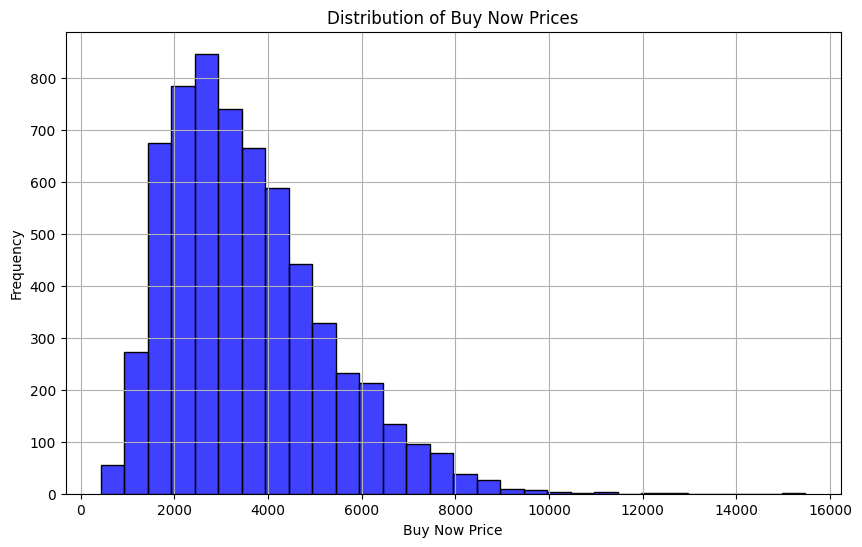

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the histogram for 'buynow_price'
plt.figure(figsize=(10, 6))
sns.histplot(final_data['buynow_price'], kde=False, color='blue', bins=30)  # Adjust bins as needed

# Customizing the plot for better readability
plt.title('Distribution of Buy Now Prices')
plt.xlabel('Buy Now Price')
plt.ylabel('Frequency')
plt.grid(True)  # Adds a grid for easier reading of values

# Show the plot
plt.show()


# **VISUALIZATION REGARDING THE NON-LINEAR RELATIONSHIP OF VARIABLES**

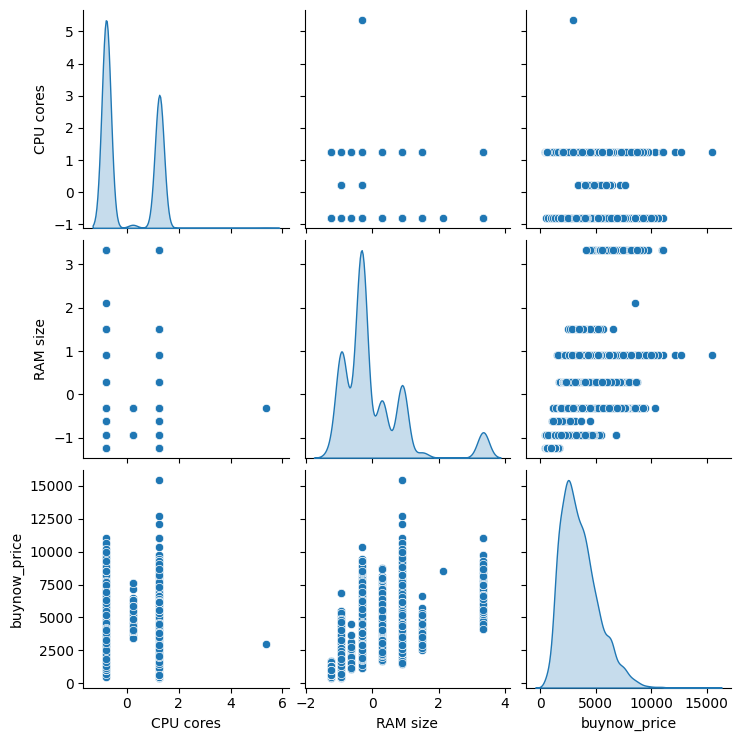

In [ ]:
import matplotlib.pyplot as plt
# Select three numerical features for visualization
features = ['CPU cores', 'RAM size','buynow_price']

# Create a pairplot using Seaborn
sns.pairplot(final_data[features], diag_kind='kde')

# Display the plot
plt.show()


## **DATASET SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale all columns of the DataFrame except the target variable (assuming it's the last column)
final_data.iloc[:, :-1] = scaler.fit_transform(final_data.iloc[:, :-1])

# Optionally, you can also scale the target variable if needed
# final_data.iloc[:, -1] = scaler.fit_transform(final_data.iloc[:, -1].values.reshape(-1, 1))

# Display the scaled DataFrame
print(final_data)


      graphic card type_dedicated graphics  \
0                                 0.790652   
1                                 0.790652   
4                                -1.264779   
5                                -1.264779   
6                                 0.790652   
...                                    ...   
7845                              0.790652   
7846                              0.790652   
7847                              0.790652   
7848                              0.790652   
7850                              0.790652   

      graphic card type_integrated graphics  warranty_producer warranty  \
0                                 -0.790652                    0.435781   
1                                 -0.790652                   -2.294733   
4                                  1.264779                    0.435781   
5                                  1.264779                    0.435781   
6                                 -0.790652                    0.435781 

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6247 entries, 0 to 7850
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   graphic card type_dedicated graphics   6247 non-null   float64
 1   graphic card type_integrated graphics  6247 non-null   float64
 2   warranty_producer warranty             6247 non-null   float64
 3   warranty_seller warranty               6247 non-null   float64
 4   CPU cores                              6247 non-null   float64
 5   RAM size                               6247 non-null   float64
 6   CPU clock speed (GHz)                  6247 non-null   float64
 7   drive memory size (GB)                 6247 non-null   float64
 8   resolution_x                           6247 non-null   float64
 9   resolution_y                           6247 non-null   float64
 10  os_['no system']                       6247 non-null   float64
 11  os_['wind

In [ ]:
final_data.head()

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),resolution_x,resolution_y,...,ddr3l,ddr4,amd a6,intel celeron,intel celeron dual-core,intel core i3,intel core i7,intel pentium dual-core,intel pentium quad-core,buynow_price
0,0.790652,-0.790652,0.435781,-0.435781,1.250892,3.342057,0.658566,1.189653,0.326408,0.324542,...,-0.308539,0.718258,-0.145208,-0.117449,-0.150854,-0.493137,1.443932,-0.163165,-0.099302,4999.0
1,0.790652,-0.790652,-2.294733,2.294733,1.250892,-0.319435,0.133448,-0.843935,-1.121707,-1.123611,...,-0.308539,-1.392258,-0.145208,-0.117449,-0.150854,-0.493137,1.443932,-0.163165,-0.099302,2649.0
4,-1.264779,1.264779,0.435781,-0.435781,1.250892,-0.319435,-3.017261,-0.843935,1.999321,1.995488,...,-0.308539,0.718258,-0.145208,-0.117449,-0.150854,-0.493137,-0.692554,-0.163165,-0.099302,4499.0
5,-1.264779,1.264779,0.435781,-0.435781,-0.803616,-0.319435,-0.916788,0.678187,-1.121707,-1.123611,...,-0.308539,0.718258,-0.145208,-0.117449,-0.150854,2.027834,-0.692554,-0.163165,-0.099302,2099.0
6,0.790652,-0.790652,0.435781,-0.435781,1.250892,-0.319435,0.133448,0.678187,0.326408,0.324542,...,-0.308539,-1.392258,-0.145208,-0.117449,-0.150854,-0.493137,1.443932,-0.163165,-0.099302,2699.0


### **Below code was required as XGBoost doesn't accept features names with special symbols**

In [ ]:
# Function to clean and ensure unique column names
def clean_column_names(columns):
    cleaned_columns = columns.str.replace('[,<>\[\]]', '', regex=True)
    # Check for and handle duplicates
    counts = cleaned_columns.value_counts()
    duplicates = counts[counts > 1].index

    for dup in duplicates:
        indices = cleaned_columns[cleaned_columns == dup].index
        # Append an index number to make names unique
        for i, ind in enumerate(indices, 1):
            cleaned_columns[ind] = f"{cleaned_columns[ind]}_{i}"

    return cleaned_columns

# Apply the function to clean column names
final_data.columns = clean_column_names(final_data.columns)

# Print updated column names
print("\nUpdated column names:")
print(final_data.columns)



Updated column names:
Index(['graphic card type_dedicated graphics',
       'graphic card type_integrated graphics', 'warranty_producer warranty',
       'warranty_seller warranty', 'CPU cores', 'RAM size',
       'CPU clock speed (GHz)', 'drive memory size (GB)', 'resolution_x',
       'resolution_y', 'os_'no system'', 'os_'windows 10 home' 'other'',
       'os_'windows 10 home'', 'os_'windows 10 professional'', 'emmc', 'hdd',
       'ssd + hdd', 'ddr3', 'ddr3l', 'ddr4', 'amd a6', 'intel celeron ',
       'intel celeron dual-core', 'intel core i3', 'intel core i7',
       'intel pentium dual-core', 'intel pentium quad-core ', 'buynow_price'],
      dtype='object')


In [ ]:
final_data.describe()

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),resolution_x,resolution_y,...,ddr3l,ddr4,amd a6,intel celeron,intel celeron dual-core,intel core i3,intel core i7,intel pentium dual-core,intel pentium quad-core,buynow_price
count,6.247000e+03,6.247000e+03,6.247000e+03,6.247000e+03,6.247000e+03,6.247000e+03,6.247000e+03,6.247000e+03,6.247000e+03,6.247000e+03,...,6.247000e+03,6.247000e+03,6.247000e+03,6.247000e+03,6.247000e+03,6.247000e+03,6.247000e+03,6.247000e+03,6.247000e+03,6247.000000
mean,1.353523e-16,3.753467e-17,-6.369520e-17,6.369520e-17,1.552571e-16,2.616053e-17,-5.118365e-16,-8.644349e-17,1.251156e-16,4.094692e-17,...,-1.279591e-17,4.094692e-17,1.819863e-17,3.867209e-17,-2.843536e-17,5.459589e-17,-1.262530e-16,-6.653874e-17,-2.445441e-17,3554.689020
std,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,...,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1670.714268
min,-1.264779e+00,-7.906517e-01,-2.294733e+00,-4.357806e-01,-8.036160e-01,-1.234809e+00,-6.167970e+00,-1.302209e+00,-1.346505e+00,-1.123611e+00,...,-3.085391e-01,-1.392258e+00,-1.452079e-01,-1.174488e-01,-1.508544e-01,-4.931370e-01,-6.925536e-01,-1.631651e-01,-9.930245e-02,429.000000
25%,-1.264779e+00,-7.906517e-01,4.357806e-01,-4.357806e-01,-8.036160e-01,-3.194355e-01,-6.542290e-01,-8.439353e-01,-1.121707e+00,-1.123611e+00,...,-3.085391e-01,-1.392258e+00,-1.452079e-01,-1.174488e-01,-1.508544e-01,-4.931370e-01,-6.925536e-01,-1.631651e-01,-9.930245e-02,2299.000000
50%,7.906517e-01,-7.906517e-01,4.357806e-01,-4.357806e-01,-8.036160e-01,-3.194355e-01,3.960074e-01,-3.447446e-01,3.264082e-01,3.245421e-01,...,-3.085391e-01,7.182578e-01,-1.452079e-01,-1.174488e-01,-1.508544e-01,-4.931370e-01,-6.925536e-01,-1.631651e-01,-9.930245e-02,3249.000000
75%,7.906517e-01,1.264779e+00,4.357806e-01,-4.357806e-01,1.250892e+00,2.908133e-01,6.585664e-01,6.781873e-01,3.264082e-01,3.245421e-01,...,-3.085391e-01,7.182578e-01,-1.452079e-01,-1.174488e-01,-1.508544e-01,-4.931370e-01,1.443932e+00,-1.631651e-01,-9.930245e-02,4499.000000
max,7.906517e-01,1.264779e+00,4.357806e-01,2.294733e+00,5.359907e+00,3.342057e+00,4.071835e+00,1.909096e+01,5.345148e+00,5.337381e+00,...,3.241081e+00,7.182578e-01,6.886680e+00,8.514348e+00,6.628910e+00,2.027834e+00,1.443932e+00,6.128762e+00,1.007025e+01,15472.650000


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6247 entries, 0 to 7850
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   graphic card type_dedicated graphics   6247 non-null   float64
 1   graphic card type_integrated graphics  6247 non-null   float64
 2   warranty_producer warranty             6247 non-null   float64
 3   warranty_seller warranty               6247 non-null   float64
 4   CPU cores                              6247 non-null   float64
 5   RAM size                               6247 non-null   float64
 6   CPU clock speed (GHz)                  6247 non-null   float64
 7   drive memory size (GB)                 6247 non-null   float64
 8   resolution_x                           6247 non-null   float64
 9   resolution_y                           6247 non-null   float64
 10  os_'no system'                         6247 non-null   float64
 11  os_'windo

###**Final_data is main dataset which will be used to test different models**

**Train/Test Split**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
y=final_data['buynow_price']
final_data=final_data.drop(columns=['buynow_price'])
X=final_data


In [ ]:
X.reset_index(drop=True,inplace=True)
y.reset_index(drop=True,inplace=True)

In [ ]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6247 entries, 0 to 6246
Series name: buynow_price
Non-Null Count  Dtype  
--------------  -----  
6247 non-null   float64
dtypes: float64(1)
memory usage: 48.9 KB


In [ ]:
pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 74.8 MB/s eta 0:00:00


In [ ]:
from dmba import regressionSummary

Colab environment detected.


# **Model Implementation**

#**1. Linear Regression**

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# Create the model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(train_X, train_y)

# Predict using the model
lr_pred = lr_model.predict(test_X)

# Evaluate using dmba
regressionSummary(test_y, lr_pred)



Regression statistics

                      Mean Error (ME) : 32.9097
       Root Mean Squared Error (RMSE) : 857.4329
            Mean Absolute Error (MAE) : 610.2076
          Mean Percentage Error (MPE) : -2.5282
Mean Absolute Percentage Error (MAPE) : 17.2966


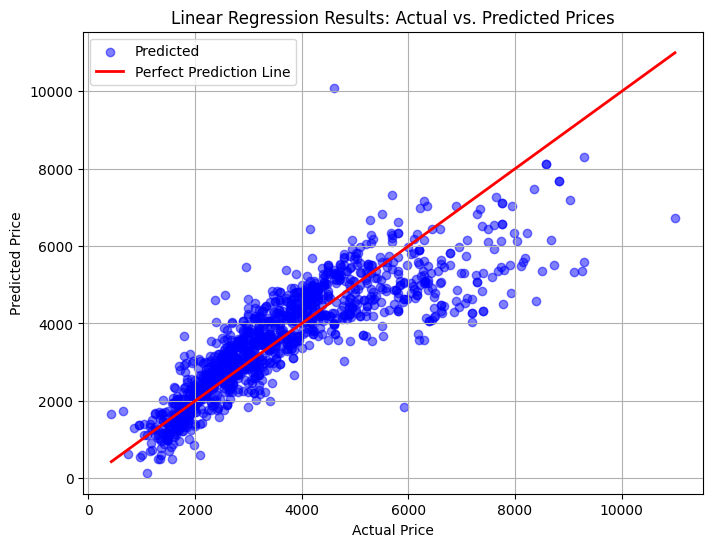

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y, lr_pred, alpha=0.5, color='blue', label='Predicted')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red', linewidth=2, label='Perfect Prediction Line')  # Line for perfect prediction
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression Results: Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

#**2. Random Forest**

In [ ]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(train_X, train_y)

# Predict using the model
rf_pred = rf_model.predict(test_X)

# Evaluate using dmba
regressionSummary(test_y, rf_pred)



Regression statistics

                      Mean Error (ME) : -9.3631
       Root Mean Squared Error (RMSE) : 596.9929
            Mean Absolute Error (MAE) : 362.7328
          Mean Percentage Error (MPE) : -2.1727
Mean Absolute Percentage Error (MAPE) : 9.7315


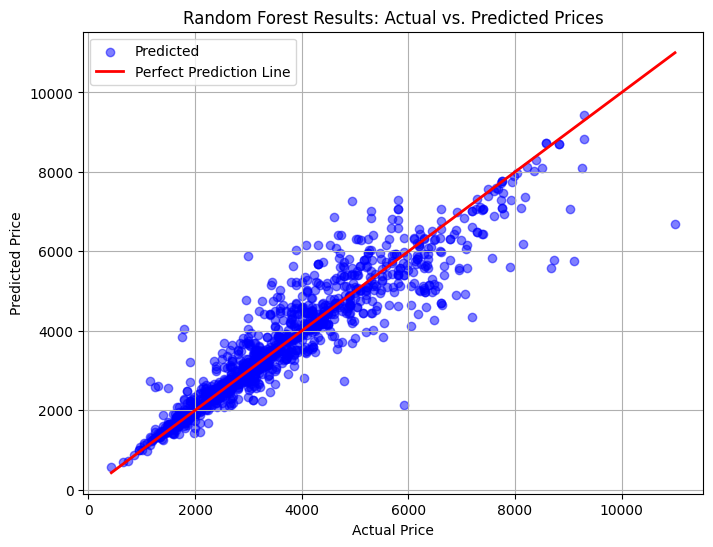

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y, rf_pred, alpha=0.5, color='blue', label='Predicted')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red', linewidth=2, label='Perfect Prediction Line')  # Line for perfect prediction
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest Results: Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

# **3. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Create the model
dt_model = DecisionTreeRegressor()

# Fit the model to the training data
dt_model.fit(train_X, train_y)

# Predict using the model
dt_pred = dt_model.predict(test_X)

# Evaluate using dmba
regressionSummary(test_y, dt_pred)


Regression statistics

                      Mean Error (ME) : -13.6227
       Root Mean Squared Error (RMSE) : 665.7888
            Mean Absolute Error (MAE) : 375.0094
          Mean Percentage Error (MPE) : -2.1146
Mean Absolute Percentage Error (MAPE) : 10.3076


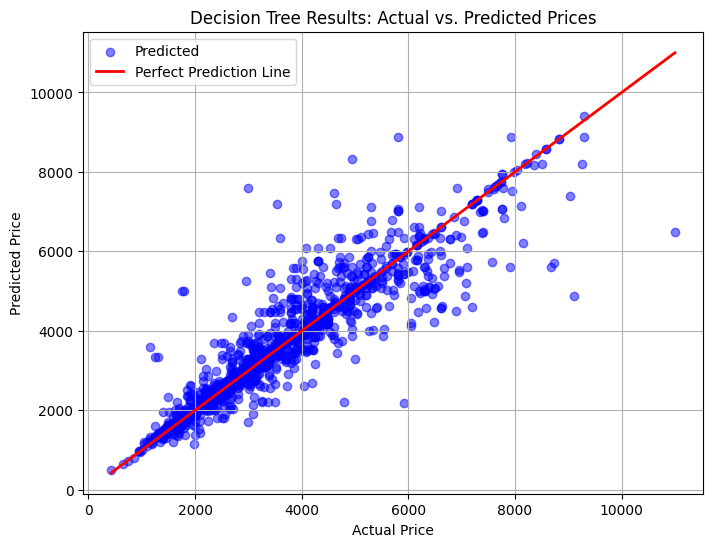

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y, dt_pred, alpha=0.5, color='blue', label='Predicted')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red', linewidth=2, label='Perfect Prediction Line')  # Line for perfect prediction
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Decision Tree Results: Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

# **4. XGBoost**

In [ ]:
from xgboost import XGBRegressor
from dmba import regressionSummary

# Create the XGBoost model
xgb_model = XGBRegressor()

# Fit the model to the training data
xgb_model.fit(train_X, train_y)

# Predict using the model
xgb_pred = xgb_model.predict(test_X)

# Evaluate using dmba
regressionSummary(test_y, xgb_pred)



Regression statistics

                      Mean Error (ME) : 17.6702
       Root Mean Squared Error (RMSE) : 566.9387
            Mean Absolute Error (MAE) : 372.1088
          Mean Percentage Error (MPE) : -1.1564
Mean Absolute Percentage Error (MAPE) : 9.9559


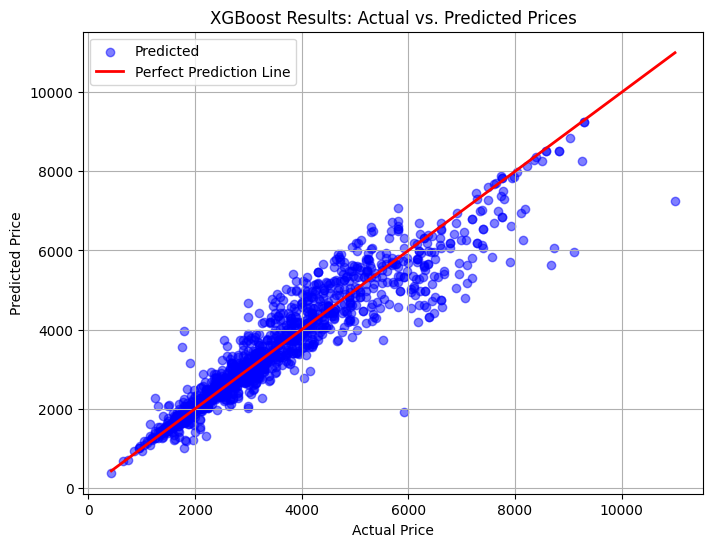

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y, xgb_pred, alpha=0.5, color='blue', label='Predicted')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red', linewidth=2, label='Perfect Prediction Line')  # Line for perfect prediction
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost Results: Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

# **5. Support Vector Regression**

In [ ]:
from sklearn.svm import SVR  # Import the SVR class
from sklearn.model_selection import GridSearchCV

# Define parameter range and grid search settings
param_grid = {
    'C': [0.1, 1],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for 'rbf', 'poly'
    'kernel': ['rbf', 'poly']  # Type of kernel
}

# Create grid search using 5-fold cross-validation
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=True, n_jobs=-1)
grid_search.fit(train_X, train_y)

# Best model after grid search
best_svm_model = grid_search.best_estimator_



# Predict using the best model
svm_pred = best_svm_model.predict(test_X)

# Evaluate the predictions
regressionSummary(test_y, svm_pred)



Fitting 5 folds for each of 16 candidates, totalling 80 fits

Regression statistics

                      Mean Error (ME) : 163.5089
       Root Mean Squared Error (RMSE) : 1024.9353
            Mean Absolute Error (MAE) : 451.6500
          Mean Percentage Error (MPE) : 1.6467
Mean Absolute Percentage Error (MAPE) : 11.4439


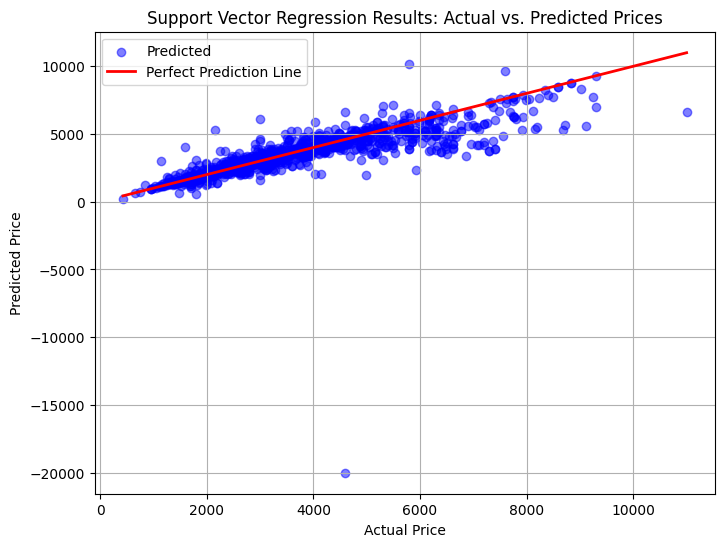

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y, svm_pred, alpha=0.5, color='blue', label='Predicted')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red', linewidth=2, label='Perfect Prediction Line')  # Line for perfect prediction
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Support Vector Regression Results: Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

# **6. Neural Network**

In [ ]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(
    hidden_layer_sizes=(7,7,6),
    activation="relu",
    solver='adam',
    learning_rate="adaptive",
    learning_rate_init=0.0125,
    max_iter=200,
    warm_start=True
)
model=nn.fit(train_X,train_y)
pred=model.predict(test_X)
print(regressionSummary(test_y,pred))


Regression statistics

                      Mean Error (ME) : 18.5177
       Root Mean Squared Error (RMSE) : 806.3943
            Mean Absolute Error (MAE) : 522.3546
          Mean Percentage Error (MPE) : -2.2869
Mean Absolute Percentage Error (MAPE) : 13.9567
None


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


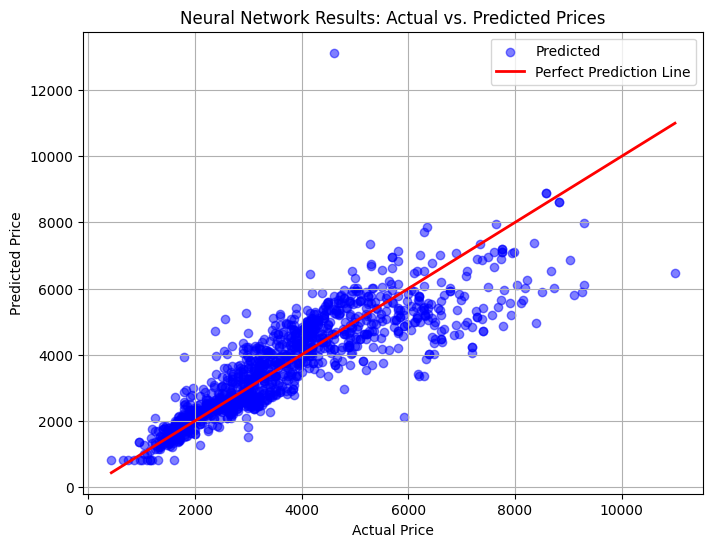

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y, pred, alpha=0.5, color='blue', label='Predicted')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red', linewidth=2, label='Perfect Prediction Line')  # Line for perfect prediction
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Neural Network Results: Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

# **7. KNN Regressor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from dmba import regressionSummary

# Create the KNN regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Fit the model to the training data
knn_model.fit(train_X, train_y)

# Predict using the model
knn_pred = knn_model.predict(test_X)

# Evaluate using dmba
regressionSummary(test_y, knn_pred)



Regression statistics

                      Mean Error (ME) : 15.8465
       Root Mean Squared Error (RMSE) : 659.7413
            Mean Absolute Error (MAE) : 428.5285
          Mean Percentage Error (MPE) : -1.6586
Mean Absolute Percentage Error (MAPE) : 11.3384


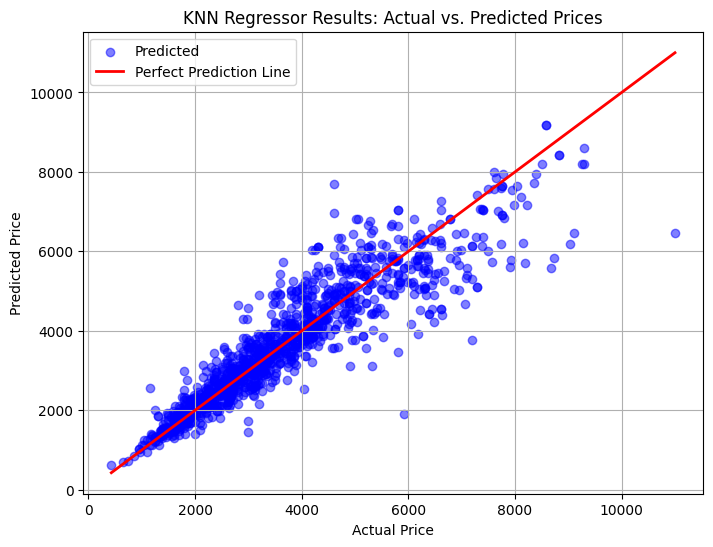

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y, knn_pred, alpha=0.5, color='blue', label='Predicted')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red', linewidth=2, label='Perfect Prediction Line')  # Line for perfect prediction
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('KNN Regressor Results: Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

# **8. Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

# Create the Lasso regression model, alpha is the regularization strength
lasso_model = Lasso(alpha=0.01)  # alpha may need tuning

# Fit the model to the training data
lasso_model.fit(train_X, train_y)

# Predict using the model
lasso_pred = lasso_model.predict(test_X)

# Evaluate using dmba
regressionSummary(test_y, lasso_pred)



Regression statistics

                      Mean Error (ME) : 32.6618
       Root Mean Squared Error (RMSE) : 857.1831
            Mean Absolute Error (MAE) : 610.1634
          Mean Percentage Error (MPE) : -2.5423
Mean Absolute Percentage Error (MAPE) : 17.3029


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.547e+09, tolerance: 1.397e+06
  model = cd_fast.enet_coordinate_descent(


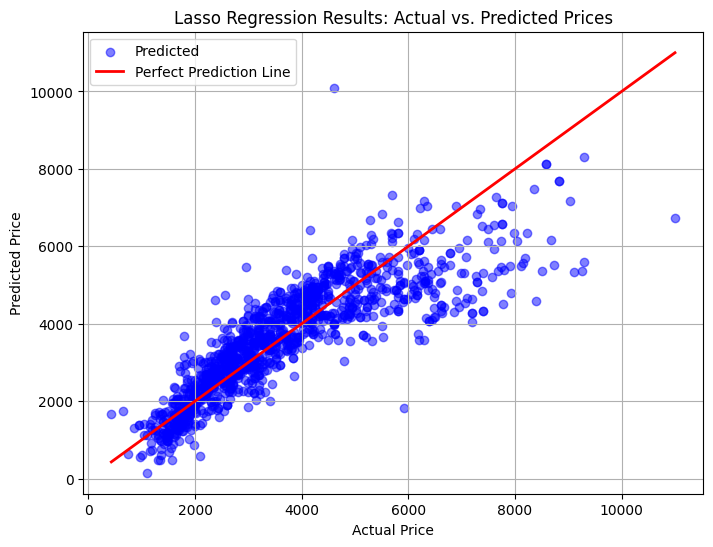

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y, lasso_pred, alpha=0.5, color='blue', label='Predicted')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red', linewidth=2, label='Perfect Prediction Line')  # Line for perfect prediction
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Lasso Regression Results: Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

# **9. Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

# Create the Ridge regression model, alpha is the regularization strength
ridge_model = Ridge(alpha=0.01)  # alpha may need tuning

# Fit the model to the training data
ridge_model.fit(train_X, train_y)

# Predict using the model
ridge_pred = ridge_model.predict(test_X)

# Evaluate using dmba
regressionSummary(test_y, ridge_pred)



Regression statistics

                      Mean Error (ME) : 32.9185
       Root Mean Squared Error (RMSE) : 857.3885
            Mean Absolute Error (MAE) : 610.2265
          Mean Percentage Error (MPE) : -2.5295
Mean Absolute Percentage Error (MAPE) : 17.3019


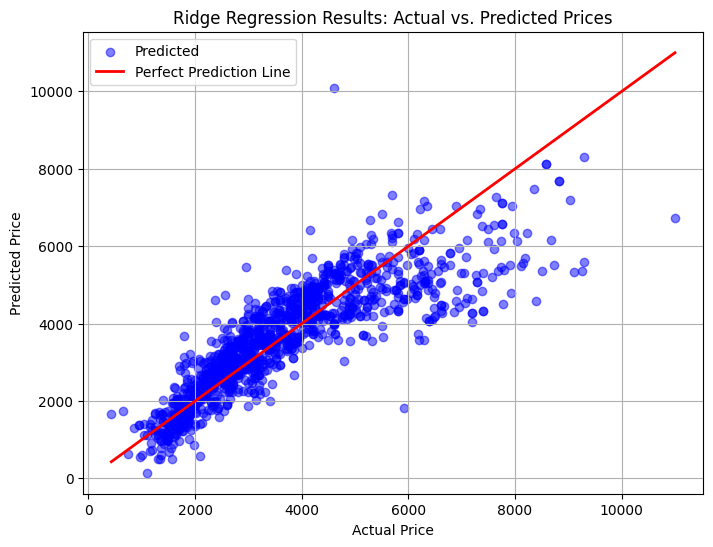

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y, ridge_pred, alpha=0.5, color='blue', label='Predicted')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red', linewidth=2, label='Perfect Prediction Line')  # Line for perfect prediction
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Ridge Regression Results: Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

# **10. Elastic Net Regression**

In [ ]:
from sklearn.linear_model import ElasticNet

# Create the Elastic Net model
# alpha is the regularization strength and l1_ratio is the mix ratio between l1 and l2
elastic_model = ElasticNet(alpha=0.01, l1_ratio=0.5)  # These parameters may need tuning

# Fit the model to the training data
elastic_model.fit(train_X, train_y)

# Predict using the model
elastic_pred = elastic_model.predict(test_X)

# Evaluate using dmba
regressionSummary(test_y, elastic_pred)



Regression statistics

                      Mean Error (ME) : 32.4189
       Root Mean Squared Error (RMSE) : 856.2830
            Mean Absolute Error (MAE) : 609.4550
          Mean Percentage Error (MPE) : -2.5941
Mean Absolute Percentage Error (MAPE) : 17.2746


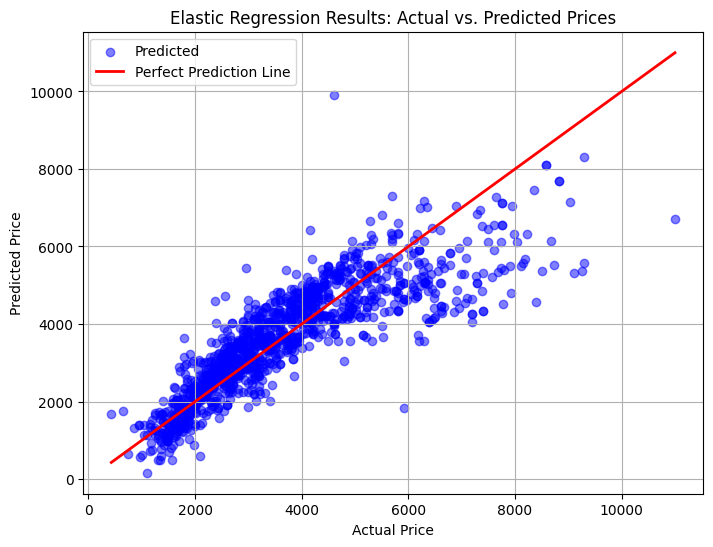

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y, elastic_pred, alpha=0.5, color='blue', label='Predicted')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red', linewidth=2, label='Perfect Prediction Line')  # Line for perfect prediction
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Elastic Regression Results: Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

# **11. Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


# Define the degree of the polynomial
degree = 1  # Adjust the degree as needed

# Create a pipeline for polynomial regression
poly_reg_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the polynomial regression model to the training data
poly_reg_model.fit(train_X, train_y)

# Predict using the polynomial regression model
poly_reg_pred = poly_reg_model.predict(test_X)

# Evaluate using dmba
regressionSummary(test_y, poly_reg_pred)



Regression statistics

                      Mean Error (ME) : 33.7930
       Root Mean Squared Error (RMSE) : 857.2987
            Mean Absolute Error (MAE) : 610.3615
          Mean Percentage Error (MPE) : -2.4858
Mean Absolute Percentage Error (MAPE) : 17.3243


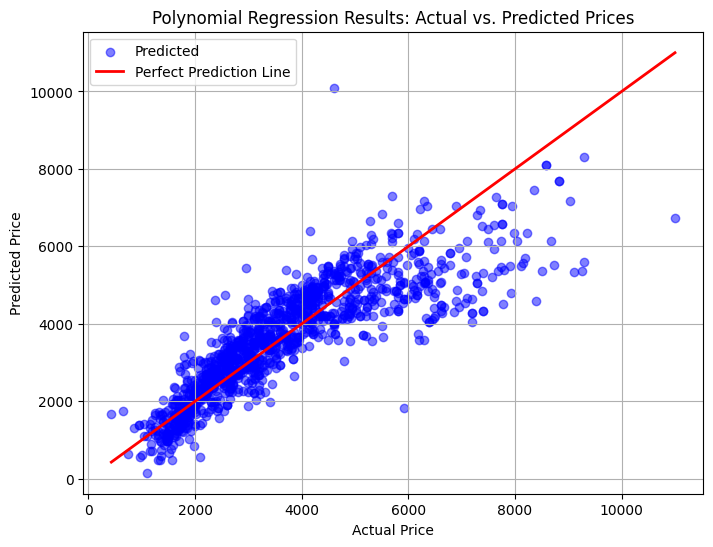

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y, poly_reg_pred, alpha=0.5, color='blue', label='Predicted')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red', linewidth=2, label='Perfect Prediction Line')  # Line for perfect prediction
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Polynomial Regression Results: Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

# **RESULTS:   EVALAUATION OF MODELS USING THE METRICS**

| Model | ME | RMSE | MAE | MPE | MAPE
|  :-  |  -:  | -: | -: | -: | -: |
| Linear Regrssion | 32.9034 | 857.4276 | 610.2195 |-2.5271 | 17.2977
| Random Forest | -7.1138 | 598.1886 | 363.4587 | -2.1509 | 9.7888
| Decision Tree |  -13.9224 | 650.5059 |371.3625 | -2.0690| 10.2363
| XGBoost | 17.6702 |566.9387 | 372.1088 | -1.1564 | 9.9559
| Support Vector Regression | 163.5089 | 1024.9353 |451.6500|1.6467|11.4439
| Neural Network | 18.5177 | 806.3943 | 522.3546 | -2.2869 | 13.9567
| KNN Regressor | 24.6272 | 654.5413 | 427.0535 | -1.4842 | 11.2909
| Lasso Regression | 32.6618 | 857.1831 | 610.1634 | -2.5423 | 17.3029
| Ridge Regression | 32.9185 | 857.3885 | 610.2265 | -2.5295 | 17.3019
| Elastic Regression | 32.4189 | 856.2830 | 609.4550 | -2.5941 | 17.2746
| Polynomial Regression | 33.5670 | 857.3906 | 610.5403 | -2.4738 | 17.3311

# **Thank you**